In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# LOAD DATA

In [2]:
build_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')
var_descr = pd.read_csv('VariableDefinitions.csv')

In [3]:
build_data.head(2)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high inc...,4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1


# Checking for cardinality

In [4]:
lis3=[]
for i in build_data:
    lis3.append(build_data[str(i)].nunique())

cardinal=pd.DataFrame(lis3,build_data.columns).reset_index()
cardinal=cardinal.rename(columns={'index':'Features',0:'cardinality'})

In [5]:
cardinal

,Features,cardinality
0,ID,104867
1,country,144
2,region,8
3,population,144
4,age,85
5,Q1,4
6,Q2,4
7,Q3,4
8,Q4,4
9,Q5,4


In [6]:
build_data.isna().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2             57146
Q3             59653
Q4             47422
Q5             47422
Q6                 0
Q7             84226
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q23            67287
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

In [7]:
test_data.isna().sum()

ID                 0
country            0
region           301
population         0
age              124
Q1                 0
Q2             24527
Q3             25595
Q4             20384
Q5             20384
Q6                 0
Q7             36069
Q8             19700
Q9             19700
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            10431
Q20            10431
Q21                0
Q22                0
Q23            28943
Q24                0
Q25                0
Q26            10431
Q27            19837
owns_mobile        1
Q28            13433
dtype: int64

In [8]:
# join train and test together
ntrain = build_data.shape[0]
ntest = test_data.shape[0]

all_data = pd.concat((build_data, test_data)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (149810, 36)


# Convert date columns to datetime datatypes 

In [9]:
for i in all_data.columns:
  if i[-4:] == 'Date':
    all_data[str(i)] = pd.to_datetime(all_data[str(i)],infer_datetime_format=True, errors='coerce')

In [10]:
#all_data['Date diff'] = (all_data['Policy End Date'].dt.year - all_data['Policy Start Date'].dt.year) * 12 \
#+ (all_data['Policy End Date'].dt.month - all_data['Policy Start Date'].dt.month)

In [11]:
all_data.dtypes

ID              object
country         object
region          object
population     float64
age            float64
Q1               int64
Q2             float64
Q3             float64
Q4             float64
Q5             float64
Q6               int64
Q7             float64
Q8             float64
Q9             float64
Q10a             int64
Q10b             int64
Q11              int64
Q12              int64
Q13a             int64
Q14              int64
Q15              int64
Q16              int64
Q17a             int64
Q17b             int64
Q19            float64
Q20            float64
Q21              int64
Q22              int64
Q23            float64
Q24              int64
Q25              int64
Q26            float64
Q27            float64
owns_mobile    float64
Q28            float64
target         float64
dtype: object

In [12]:
build_data.describe()

,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
count,1.048670e+05,104580.000000,104867.000000,47721.000000,45214.000000,57445.000000,57445.000000,104867.000000,20641.000000,59029.000000,...,104867.000000,104867.000000,37580.000000,104867.000000,104867.000000,80694.000000,58429.000000,104866.000000,73862.000000,104867.000000
mean,6.728827e+07,41.820922,1.556000,1.060078,1.297784,1.618835,1.556202,1.818542,1.153772,1.220485,...,1.432052,1.650252,1.745796,1.861930,1.880801,1.855565,1.846378,1.176377,1.125586,0.581794
std,2.095529e+08,17.823733,0.522745,0.274234,0.466056,0.496068,0.509122,0.429471,0.372760,0.439298,...,0.516419,0.498633,0.452266,0.375167,0.357280,0.375795,0.393282,0.394253,0.343106,0.493267
min,3.739912e+05,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.335264e+06,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,9.386639e+06,39.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,3.051912e+07,55.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,1.134634e+09,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [13]:
test_data.describe()

,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
count,4.494300e+04,44819.000000,44943.000000,20416.000000,19348.000000,24559.000000,24559.000000,44943.000000,8874.000000,25243.000000,...,34512.000000,44943.000000,44943.000000,16000.000000,44943.000000,44943.000000,34512.000000,25106.000000,44942.000000,31510.000000
mean,6.933004e+07,41.754725,1.557751,1.060345,1.291245,1.613461,1.548638,1.818481,1.164526,1.215347,...,1.778338,1.434172,1.651937,1.745375,1.860112,1.877957,1.855036,1.847686,1.179899,1.128086
std,2.138406e+08,17.910557,0.524973,0.276046,0.460225,0.497145,0.511519,0.431224,0.382444,0.436680,...,0.439966,0.515070,0.496399,0.451723,0.374631,0.357305,0.377105,0.391279,0.398606,0.349055
min,3.739912e+05,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.300062e+06,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,9.386639e+06,39.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
75%,3.051912e+07,55.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,1.134634e+09,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


noticed some strange occurence in the age column, as regarding the max and min

pre-processing the age column

In [14]:
all_data['age'].loc[all_data['age'] < 0] = all_data['age'].loc[all_data['age'] < 0] * -1

C:\Users\Ajaxclopidia\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
all_data['Age'] = np.where(all_data['age'] == 320, 120, all_data['age'])
all_data['Age'] = np.where(all_data['age'] > 320, 99, all_data['age'])

In [16]:
all_data[all_data['age']>120]

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target,Age


In [17]:
cardinal

,Features,cardinality
0,ID,104867
1,country,144
2,region,8
3,population,144
4,age,85
5,Q1,4
6,Q2,4
7,Q3,4
8,Q4,4
9,Q5,4


# EDA

<AxesSubplot:xlabel='Q1', ylabel='count'>

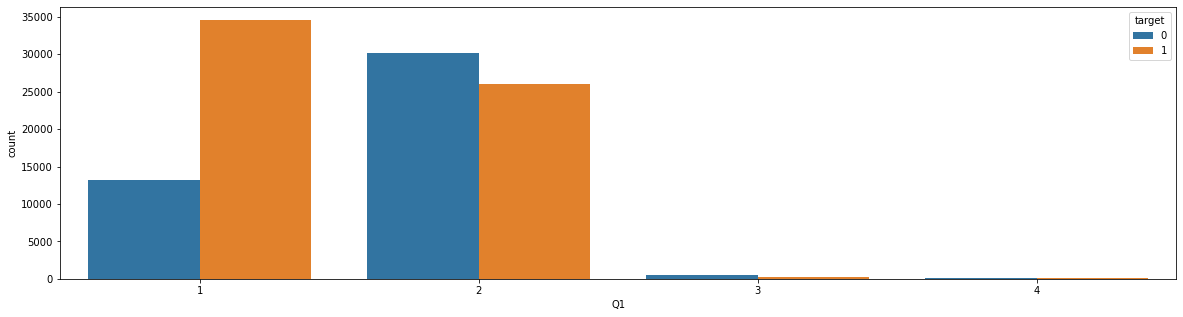

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x='Q1',hue="target",data=build_data)

<AxesSubplot:xlabel='Q7', ylabel='count'>

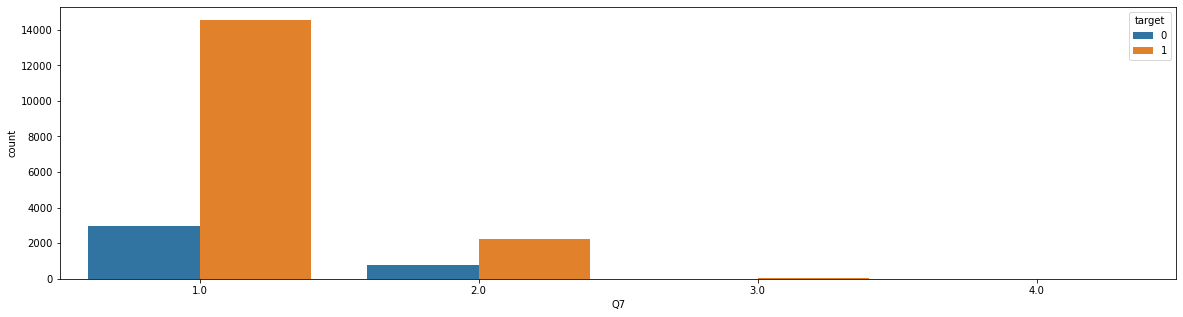

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='Q7',hue="target",data=build_data)

<AxesSubplot:xlabel='Q28', ylabel='count'>

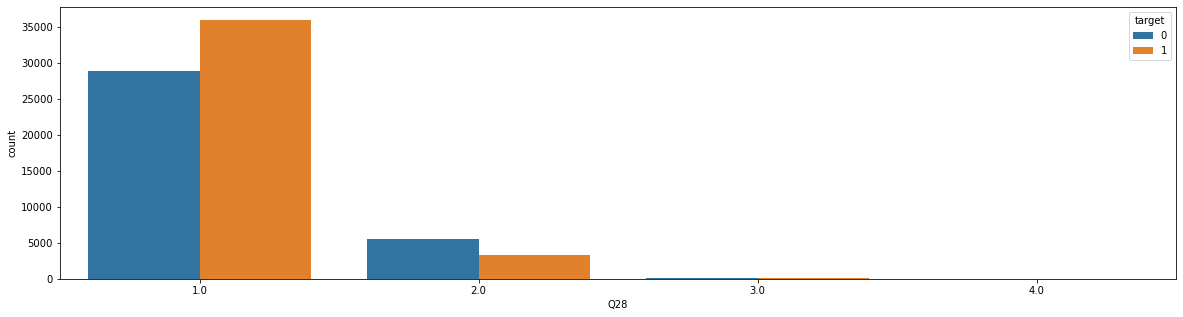

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='Q28',hue="target",data=build_data)

<AxesSubplot:>

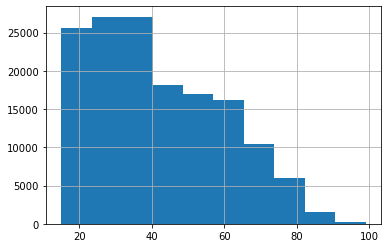

In [21]:
all_data['Age'].hist()

In [22]:
def crosstab(col, data):
  return pd.crosstab(data[col],data['target'], normalize=True)

In [23]:
all_data.columns

Index(['ID', 'country', 'region', 'population', 'age', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a',
       'Q14', 'Q15', 'Q16', 'Q17a', 'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'owns_mobile', 'Q28', 'target', 'Age'],
      dtype='object')

In [24]:
crosstab('Q1', build_data)

target,0,1
Q1,,
1,0.125292,0.329770
2,0.287574,0.248438
3,0.004415,0.002374
4,0.000925,0.001211


In [25]:
crosstab('country', build_data)

target,0,1
country,,
Afghanistan,0.002565,0.004062
Albania,0.003051,0.003557
Algeria,0.001774,0.004463
Argentina,0.004205,0.002355
Armenia,0.003652,0.002565
...,...,...
"Venezuela, RB",0.003519,0.003099
Vietnam,0.001545,0.004644
West Bank and Gaza,0.002584,0.003910


In [26]:
crosstab('Q23', build_data)

target,0,1
Q23,,
1.0,0.056413,0.203805
2.0,0.227142,0.508089
3.0,0.001277,0.001809
4.0,0.000585,0.000878


In [27]:
crosstab('Q2', build_data)

target,0,1
Q2,,
1.0,0.254877,0.692588
2.0,0.017686,0.029128
3.0,0.002033,0.001865
4.0,0.000733,0.001090


# Extract Date features

In [28]:
#date_col = ['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [29]:
''''def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)'''

"'def extract_date_info(df,cols,):\n    for feat in cols:\n        df[feat +'_day'] = df[feat].dt.day\n        df[feat +'_month'] = df[feat].dt.month\n        df[feat +'_quarter'] = df[feat].dt.quarter\n    df.drop(columns=date_col,axis=1,inplace=True)"

In [30]:
#extract_date_info(all_data,date_col)

In [31]:
all_data1 = all_data.copy()

In [32]:
cat_feat = all_data1.select_dtypes(exclude = np.number).columns
num_feat = all_data1.select_dtypes(exclude = object).columns

In [33]:
num_feat

Index(['population', 'age', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14', 'Q15', 'Q16', 'Q17a',
       'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'owns_mobile', 'Q28', 'target', 'Age'],
      dtype='object')

In [34]:
cat_feat

Index(['ID', 'country', 'region'], dtype='object')

# Deal with missing values

In [35]:
for col in num_feat:
  if col != 'target':
    all_data1[col].fillna(-999, inplace = True)
    
    
    
for col in cat_feat:
    all_data1[col].fillna('NONE', inplace = True)

In [36]:
all_data1.head(3)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target,Age
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,66.0,2,-999.0,-999.0,-999.0,-999.0,...,2,-999.0,1,2,2.0,2.0,1.0,1.0,0.0,66.0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high inc...,4591023.0,44.0,2,-999.0,-999.0,2.0,2.0,...,2,-999.0,2,2,2.0,1.0,1.0,1.0,1.0,44.0
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,2.0,2,2,2.0,-999.0,1.0,1.0,0.0,29.0


# Feature Engineering

In [37]:
all_data1['National_ID'] = all_data1['Q28'].map(all_data1['Q28'].value_counts().to_dict())
all_data1['Region'] = all_data1['region'].map(all_data1['region'].value_counts().to_dict())

In [38]:
all_data1['Use_internet'] = all_data1['Q10a'] + all_data1['Q10b']
all_data1['merge'] = all_data1['Q26'] + all_data1['Q27']
all_data1['Borrow'] = all_data1['Q17a'] + all_data1['Q17b']

In [39]:
#all_data1['Subject_Car_Make'] = all_data1['Subject_Car_Make'].map(all_data1['Subject_Car_Make'].value_counts().to_dict())
#all_data1['Subject_Car_Colour'] = all_data1['Subject_Car_Colour'].map(all_data1['Subject_Car_Colour'].value_counts().to_dict())

In [40]:
#mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',None:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }
#all_data1.Gender = all_data.Gender.map(mapper)

In [41]:
#encode categorical variable

from sklearn.preprocessing import LabelEncoder
for i in ['country', 'region']:
  encoder = LabelEncoder()
  all_data1[str(i)] = encoder.fit_transform(all_data1[str(i)])
# Category columns
cat_cols = ['country','region']
num_cols = ['age', 'population']

# Confirm whether the changes have been successful
all_data.info()
# encoding
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q2           68137 non-null   float64
 7   Q3           64562 non-null   float64
 8   Q4           82004 non-null   float64
 9   Q5           82004 non-null   float64
 10  Q6           149810 non-null  int64  
 11  Q7           29515 non-null   float64
 12  Q8           84272 non-null   float64
 13  Q9           84272 non-null   float64
 14  Q10a         149810 non-null  int64  
 15  Q10b         149810 non-null  int64  
 16  Q11          149810 non-null  int64  
 17  Q12          149810 non-null  int64  
 18  Q13a         149810 non-

,ID,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,country_Zambia,country_Zimbabwe,region_East Asia & Pacific (excluding high income),region_Europe & Central Asia (excluding high income),region_High income: OECD,region_High income: nonOECD,region_Latin America & Caribbean (excluding high income),region_Middle East & North Africa (excluding high income),region_South Asia,region_Sub-Saharan Africa (excluding high income)
0,ID_0000020532,25550170.0,66.0,2,NaN,NaN,NaN,NaN,2,NaN,...,0,0,0,0,0,0,0,1,0,0
1,ID_0000075765,4591023.0,44.0,2,NaN,NaN,2.0,2.0,2,NaN,...,0,0,0,0,0,0,0,1,0,0
2,ID_0000085491,25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,NaN,...,0,0,0,0,0,0,0,1,0,0
3,ID_0000144505,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,NaN,...,0,0,0,0,1,0,0,0,0,0
4,ID_0000214184,93002320.0,36.0,2,NaN,NaN,NaN,NaN,2,NaN,...,0,0,0,0,0,0,1,0,0,0


In [42]:
all_data1.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q27,owns_mobile,Q28,target,Age,National_ID,Region,Use_internet,merge,Borrow
0,ID_0000020532,89,5,25550170.0,66.0,2,-999.0,-999.0,-999.0,-999.0,...,2.0,1.0,1.0,0.0,66.0,92441,13793,4,4.0,3
1,ID_0000075765,71,5,4591023.0,44.0,2,-999.0,-999.0,2.0,2.0,...,1.0,1.0,1.0,1.0,44.0,92441,13793,4,3.0,3
2,ID_0000085491,89,5,25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,-999.0,1.0,1.0,0.0,29.0,92441,13793,4,-997.0,4
3,ID_0000144505,21,2,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,-999.0,1.0,-999.0,1.0,44.0,44438,30303,2,-1998.0,3
4,ID_0000214184,85,4,93002320.0,36.0,2,-999.0,-999.0,-999.0,-999.0,...,2.0,1.0,1.0,1.0,36.0,92441,16158,3,4.0,4


In [43]:
print("Are There still Missing value in data? :",all_data1.isnull().any().any())
print((all_data1.isnull().sum()/all_data1.shape[0])*100)

Are There still Missing value in data? : True
ID               0.0
country          0.0
region           0.0
population       0.0
age              0.0
Q1               0.0
Q2               0.0
Q3               0.0
Q4               0.0
Q5               0.0
Q6               0.0
Q7               0.0
Q8               0.0
Q9               0.0
Q10a             0.0
Q10b             0.0
Q11              0.0
Q12              0.0
Q13a             0.0
Q14              0.0
Q15              0.0
Q16              0.0
Q17a             0.0
Q17b             0.0
Q19              0.0
Q20              0.0
Q21              0.0
Q22              0.0
Q23              0.0
Q24              0.0
Q25              0.0
Q26              0.0
Q27              0.0
owns_mobile      0.0
Q28              0.0
target          30.0
Age              0.0
National_ID      0.0
Region           0.0
Use_internet     0.0
merge            0.0
Borrow           0.0
dtype: float64


In [44]:
all_data1.drop(columns=['ID'],inplace=True)

In [45]:
all_data1=pd.get_dummies(all_data1)


# Model training

In [46]:
#Get the new dataset
train_n = all_data1[:ntrain].copy()
test_n = all_data1[ntrain:].copy()

In [47]:
test_n.drop("target",axis = 1,inplace = True)

In [48]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [49]:
#pip install catboost

In [50]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.utils import class_weight
class_weight = dict(zip(np.unique(y), class_weight.compute_class_weight('balanced',
                                                 np.unique(y),
                                                 y))) 

C:\Users\Ajaxclopidia\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0. 1.], y=0         0.0
1         1.0
2         0.0
3         1.0
4         1.0
         ... 
104862    0.0
104863    1.0
104864    0.0
104865    1.0
104866    0.0
Name: target, Length: 104867, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Using Catboost

In [64]:
model2=CatBoostClassifier(class_weights=class_weight, n_estimators=1000,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True,allow_writing_files=False, metric_period=20)

In [65]:
model2.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	test: 0.7219588	best: 0.7219588 (0)	total: 37.4ms	remaining: 37.3s
20:	test: 0.7593164	best: 0.7593164 (20)	total: 654ms	remaining: 30.5s
40:	test: 0.7716664	best: 0.7716664 (40)	total: 1.27s	remaining: 29.6s
60:	test: 0.7790716	best: 0.7790716 (60)	total: 1.86s	remaining: 28.6s
80:	test: 0.7836615	best: 0.7836615 (80)	total: 2.47s	remaining: 28s
100:	test: 0.7871381	best: 0.7871381 (100)	total: 3.09s	remaining: 27.5s
120:	test: 0.7899783	best: 0.7899783 (120)	total: 3.72s	remaining: 27s
140:	test: 0.7930079	best: 0.7930079 (140)	total: 4.33s	remaining: 26.4s
160:	test: 0.7950787	best: 0.7950787 (160)	total: 4.92s	remaining: 25.6s
180:	test: 0.7962256	best: 0.7962256 (180)	total: 5.55s	remaining: 25.1s
200:	test: 0.7976293	best: 0.7976293 (200)	total: 6.15s	remaining: 24.4s
220:	test: 0.7987370	best: 0.7987370 (220)	total: 6.74s	remaining: 23.8s
240:	test: 0.7994783	best: 0.7994783 (240)	total: 7.38s	remaining: 23.2s
260:	test: 0.8000361	best: 0.8000361 (260)	total: 7.97s	remaining:

Using xgboost

In [66]:
from sklearn.metrics import auc, classification_report, roc_auc_score

In [67]:
# Make predictions
y_pred = model2.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'catboost AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

catboost AUC score on the X_test is: 0.8053381497537868

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70      4467
         1.0       0.79      0.70      0.74      6020

    accuracy                           0.72     10487
   macro avg       0.72      0.73      0.72     10487
weighted avg       0.73      0.72      0.73     10487



C:\Users\Ajaxclopidia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


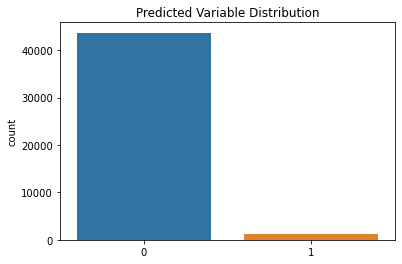

In [68]:
# Make prediction on the test set
test_df = test_n
predictions = model2.predict_proba(test_df)[:, 1]

# # Create a submission file
ss = pd.read_csv('SampleSubmission.csv')
sub_file = ss.copy()
#sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [69]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline_4.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.244146
1,ID_0000389416,0.042188
2,ID_0000634789,0.043142
3,ID_0000778100,0.465844
4,ID_0001123210,0.091822


In [70]:
from lightgbm import LGBMClassifier

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
X_resample, y_resample = SMOTE().fit_resample(X,y.ravel())

In [73]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [75]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [76]:
model2=CatBoostClassifier(class_weights=class_weight, n_estimators=800,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True,allow_writing_files=False, metric_period=20)

In [77]:
model2.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	test: 0.7118538	best: 0.7118538 (0)	total: 453ms	remaining: 6m 2s
20:	test: 0.7811663	best: 0.7811663 (20)	total: 1.16s	remaining: 43.1s
40:	test: 0.8003903	best: 0.8003903 (40)	total: 1.89s	remaining: 34.9s
60:	test: 0.8102195	best: 0.8102195 (60)	total: 2.9s	remaining: 35.1s
80:	test: 0.8163752	best: 0.8163752 (80)	total: 3.59s	remaining: 31.9s
100:	test: 0.8207090	best: 0.8207090 (100)	total: 4.23s	remaining: 29.3s
120:	test: 0.8241647	best: 0.8241647 (120)	total: 4.83s	remaining: 27.1s
140:	test: 0.8273286	best: 0.8273286 (140)	total: 5.47s	remaining: 25.6s
160:	test: 0.8293247	best: 0.8293247 (160)	total: 6.11s	remaining: 24.3s
180:	test: 0.8315332	best: 0.8315332 (180)	total: 6.75s	remaining: 23.1s
200:	test: 0.8326560	best: 0.8326560 (200)	total: 7.34s	remaining: 21.9s
220:	test: 0.8336703	best: 0.8336703 (220)	total: 7.98s	remaining: 20.9s
240:	test: 0.8344668	best: 0.8344668 (240)	total: 8.56s	remaining: 19.9s
260:	test: 0.8353004	best: 0.8353004 (260)	total: 9.19s	remainin

In [78]:
# Make predictions
y_pred = model2.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'catboost AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

catboost AUC score on the X_test is: 0.8425696134041635

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77     18234
         1.0       0.80      0.67      0.73     18373

    accuracy                           0.75     36607
   macro avg       0.76      0.75      0.75     36607
weighted avg       0.76      0.75      0.75     36607



C:\Users\Ajaxclopidia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


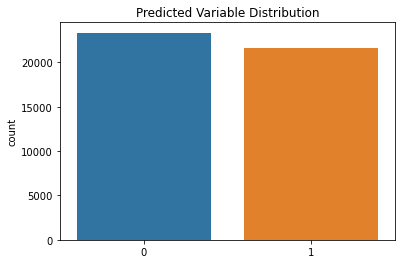

In [79]:
# Make prediction on the test set
test_df = test_n
predictions = model2.predict_proba(test_df)[:, 1]

# # Create a submission file
ss = pd.read_csv('SampleSubmission.csv')
sub_file = ss.copy()
#sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [80]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline_5.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.724708
1,ID_0000389416,0.225321
2,ID_0000634789,0.370925
3,ID_0000778100,0.962721
4,ID_0001123210,0.451296


In [ ]:
X = np.nan_to_num(X_train)
y = np.nan_to_num(y_train)
X = np.nan_to_num(X_test)
y = np.nan_to_num(y_test)

In [81]:
# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

C:\Users\Ajaxclopidia\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBM AUC score on the X_test is: 0.8379867249561764

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75     18234
         1.0       0.76      0.74      0.75     18373

    accuracy                           0.75     36607
   macro avg       0.75      0.75      0.75     36607
weighted avg       0.75      0.75      0.75     36607



C:\Users\Ajaxclopidia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


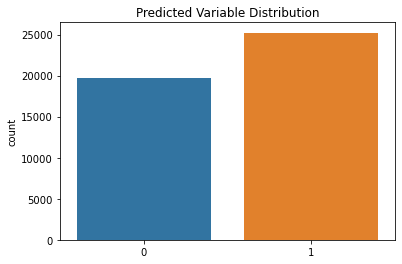

In [82]:
# Make prediction on the test set
test_df = test_n
predictions = model.predict_proba(test_df)[:, 1]

# # Create a submission file
ss = pd.read_csv('SampleSubmission.csv')
sub_file = ss.copy()
#sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [83]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline_7.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.817086
1,ID_0000389416,0.315389
2,ID_0000634789,0.430590
3,ID_0000778100,0.962578
4,ID_0001123210,0.562628


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
sub_file = ss.copy()

Cross validation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

target = np.array('target')
features = np.array([c for c in train_n.columns if c not in ['target']])

In [ ]:
scores = 0
test_oofs = []
k = 5
kf = StratifiedKFold(k)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = np.array(train_n.loc[tr_idx, features]), np.array(train_n.loc[tr_idx, target])
    xval, yval = np.array(train_n.loc[vr_idx, features]), np.array(train_n.loc[vr_idx, target])
    
    
        #scaler1.fit(xtrain)
    
    #xtrain = scaler1.transform(xtrain)
    #xval = scaler1.transform(xval)
    test = test_n[features]

   # training and validation

    model=LGBMClassifier( max_depth=10, \
                        learning_rate=0.143242, n_estimators=800, silent=True,\
                        colsample_bytree=0.8, reg_alpha=0.8)
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=100,verbose=100)
    pred = model.predict(xval)

    #predicting on test set
    predictions = model.predict(test)
    score = roc_auc_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('roc_auc_score : ', scores)

In [ ]:
predictions = np.mean(test_oofs, axis=0)
predtest = [int(round(i)) for i in predictions]
sub_file.target = predtest
sub_file.to_csv('newfoldxgb_1.csv',index=False) #0.65863 priv LB

In [ ]:
scores = 0
test_oofs = []
k = 8
kf = StratifiedKFold(k)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]
    
    #scaler1.fit(xtrain)
    
    #xtrain = scaler1.transform(xtrain)
    #xval = scaler1.transform(xval)
    test = test_n[features]

   # training and validation
    model=CatBoostClassifier(class_weights=class_weight, n_estimators=800,eval_metric='AUC',max_depth=4,learning_rate=0.1,
                                #reg_lambda=5,#5
                                subsample=0.9,bootstrap_type='Bernoulli',leaf_estimation_iterations=10,
                                l2_leaf_reg=5,random_strength=100,
                                use_best_model=True,allow_writing_files=False, metric_period=20)
    model.fit(X_train, y_train, eval_set=(xval, yval))
    pred = model.predict(xval)

    #predicting on test set
    predictions = model.predict(test)
    score = roc_auc_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('roc_auc_score : ', scores)

In [ ]:
predictions = np.mean(test_oofs, axis=0)
predtest = [int(round(i)) for i in predictions]
sub_file.target = predtest
sub_file.to_csv('newfoldxgb2.csv',index=False) # 0.658569 priv LB

Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [ ]:
ctb1=CatBoostClassifier(class_weights=class_weight, n_estimators=800,\
                        eval_metric='AUC',max_depth=4,learning_rate=0.1,
                              subsample=0.9,bootstrap_type='Bernoulli'
                    ,allow_writing_files=False, metric_period=20)

In [ ]:
xgb1=XGBClassifier(scale_pos_weight=8.1922929, max_depth=10, \
                        learning_rate=0.143242, n_estimators=800, silent=True,\
                        metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)

xgb2=XGBClassifier(scale_pos_weight=8.5922929, max_depth=12, \
                        learning_rate=0.163242, n_estimators=800, silent=True,\
                        metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)

ctb1=CatBoostClassifier(class_weights=class_weight, n_estimators=800,\
                        eval_metric='AUC',max_depth=4,learning_rate=0.1,
                              subsample=0.9,bootstrap_type='Bernoulli'
                    ,allow_writing_files=False, metric_period=20)


In [ ]:
vcf = VotingClassifier(estimators=[('ctb1', ctb1)], voting='soft')

In [ ]:
scores = 0
test_oofs = []
k = 8
kf = StratifiedKFold(k)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]
    
    test = test_n[features]
    vcf.fit(xtrain,ytrain)

    pred = vcf.predict(xval)

    #predicting on test set
    predictions = vcf.predict(test)
    score = roc_auc_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('roc_auc_score : ', scores)

In [ ]:
predictions = np.mean(test_oofs, axis=0)
predtest = [int(round(i)) for i in predictions]
sub_file.target = predtest
sub_file.to_csv('vcf.csv',index=False) # 0.65957 priv LB